In [17]:
import sys
sys.path.append("/Users/jameskitchens/Documents/GitHub/terracotta")
import terracotta as tct
import importlib
importlib.reload(tct)

import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

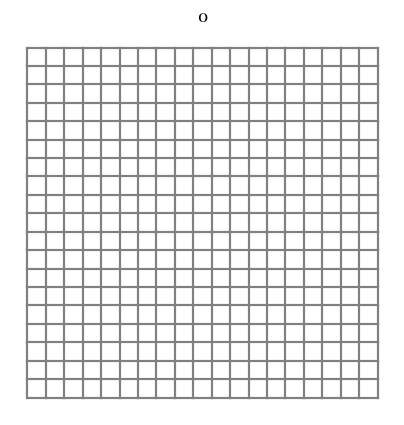

In [18]:
demes = pd.read_csv("dataset/demes.tsv", sep="\t")
world_map = tct.WorldMap(demes)
world_map.draw(figsize=(5,5), asymmetric=False)

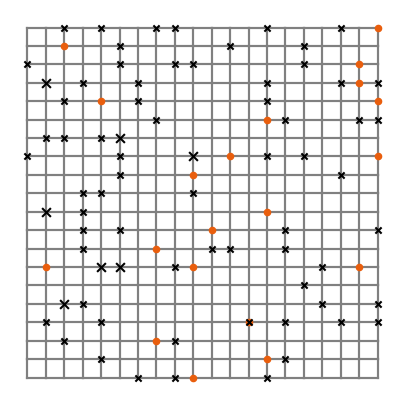

In [27]:
def _calc_optimal_organization_of_suplots(num_plots):
    ncols = math.ceil(math.sqrt(num_plots))
    nrows = math.ceil(num_plots/ncols)
    return nrows, ncols

figsize = (5,5)
times=None
color_connections=False
color_demes=False
asymmetric=False
        
if times is None:
    times = world_map.epochs

nrows, ncols = _calc_optimal_organization_of_suplots(num_plots=len(times))

if color_connections:
    num_connection_types = len(world_map.existing_connection_types)
    color_rnd = random.Random()
    color_rnd.seed(1)
    connection_colors = ["#"+''.join([color_rnd.choice("0123456789ABCDEF") for j in range(6)]) for i in range(num_connection_types)]

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

if len(times) == 1:
    axs = np.array([[axs]])
elif nrows == 1:
    axs = np.array([axs])

for e in range(nrows*ncols):
    if e < len(times):
        for _,row in world_map.connections[e].iterrows():
            deme_0 = world_map.get_coordinates_of_deme(row["deme_0"])
            deme_1 = world_map.get_coordinates_of_deme(row["deme_1"])

            if asymmetric:
                dx = deme_1[0]-deme_0[0]
                dy = deme_1[1]-deme_0[1]
                length_of_line = math.sqrt(dx**2 + dy**2)
                angle_rad = math.atan2(dy, dx)
                shift_along_x = math.cos(angle_rad) * (length_of_line*0.2)
                shift_along_y = math.sin(angle_rad) * (length_of_line*0.2)
                angle_deg = math.degrees(angle_rad)
                perp_angle_rad = math.atan2(-dx, dy)
                shift_perp_x = math.cos(perp_angle_rad) * 0.1
                shift_perp_y = math.sin(perp_angle_rad) * 0.1
                if (angle_deg >= 0) and (angle_deg < 180):
                    x = deme_0[0] + shift_along_x + shift_perp_x
                    y = deme_0[1] + shift_along_y + shift_perp_y
                else:
                    x = deme_0[0] + shift_along_x + shift_perp_x
                    y = deme_0[1] + shift_along_y + shift_perp_y

                if color_connections:
                    color = connection_colors[np.where(world_map.existing_connection_types==row["type"])[0][0]]
                else:
                    color="grey"
                axs[e//ncols, e%ncols].arrow(x, y, dx*0.6, dy*0.6, length_includes_head=True, color=color, head_width=0.1)
            else:
                axs[e//ncols, e%ncols].plot([deme_0[0], deme_1[0]], [deme_0[1], deme_1[1]], color="grey")
        deme_types_at_time = world_map.get_all_deme_types_at_time(times[e])
    axs[e//ncols, e%ncols].set_aspect("equal", 'box')
    axs[e//ncols, e%ncols].axis("off")

hc_samples = pd.read_csv("dataset/hc_samples.tsv", sep="\t")
deme_hc_sample_counts = hc_samples.value_counts("deme").reset_index()

for i,row in world_map.demes.iterrows():
    count = sum(deme_hc_sample_counts.loc[deme_hc_sample_counts["deme"]==row["id"], "count"])
    if count > 0:
        plt.scatter(row["xcoord"], row["ycoord"], s=count*20, color="#E95E0D", zorder=2)

lc_samples = pd.read_csv("dataset/lc_samples.tsv", sep="\t")
deme_lc_sample_counts = lc_samples.value_counts("deme").reset_index()

for i,row in world_map.demes.iterrows():
    count = sum(deme_lc_sample_counts.loc[deme_lc_sample_counts["deme"]==row["id"], "count"])
    if count > 0:
        plt.scatter(row["xcoord"], row["ycoord"], s=count*20, marker="x", color="black", zorder=3)

plt.axis("off")
plt.show()